# Listing of libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
from sklearn.manifold import MDS
from sklearn import preprocessing
from numpy import sqrt, pi, exp, linspace, random
from matplotlib import colors as mcolors
from sklearn.manifold import TSNE
from matplotlib import colors
import pylab as pl
from sklearn.cluster import KMeans
from minepy import MINE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import os, numpy as np, PIL
from PIL import Image
from sklearn.metrics.cluster import entropy
import cv2

Populating the interactive namespace from numpy and matplotlib


# Extracting features

In [2]:
with open('/Users/shruti6991/Desktop/523project/saxs.csv', newline='') as csvfile:
    rawdata = pd.read_csv(csvfile)
    csv_data_dataframe = pd.DataFrame(rawdata, columns = ['item','sample','metadata_extract','linecut_qr'])
    item_csv_data = csv_data_dataframe['item']
    sample_csv_data = csv_data_dataframe['sample']
    meta_csv_data = csv_data_dataframe['metadata_extract']
    linecut_csv_data = csv_data_dataframe['linecut_qr']
    
    #the item data is stripped to generate a feature table with features like 'type' , 'name' and so on
    item_csv_data = item_csv_data.str.split('_', expand=True)
    item_csv_feature_data = pd.DataFrame(item_csv_data)
    item_csv_feature_data.columns = ['type', 'name','theta','annealing_time','annealing_temperature','time','sequenceid','8','9','10','11','12']
    item_csv_feature_data = item_csv_feature_data.drop(labels=['8','9','10','11','12'], axis=1)

# Extraction of linecut_qr features and metadata features

In [3]:
# Create separate tables for both linecut and metadata features
line_cut_features = pd.DataFrame(linecut_csv_data)
meta_data_features = pd.DataFrame(meta_csv_data)

# Drop null values
line_cut_features = line_cut_features.dropna()
meta_data_features = meta_data_features.dropna()

# Metadata feature extraction

In [4]:
# extract each feature and store in list to include later in the dataframe
theta_list = []
sequence_ID_list = []
time_list = []

x = meta_data_features['metadata_extract']
for row in x:
    evaluated_val = eval(row)
    theta_list.append(evaluated_val['data']['theta'])
    sequence_ID_list.append(evaluated_val['data']['sequence_ID'])
    time_list.append(evaluated_val['time'])

In [5]:
# do separately for annealing time to fill in missing values with 0
annealing_time = []
x = meta_data_features['metadata_extract']
i = 0
for row in x:
    evaluated_val = eval(row)
    i = i + 1
    try :
        annealing_time.append(evaluated_val['data']['annealing_time'])
    except:
        annealing_time.append(0)        

# Linecut feature extraction

In [6]:
# extract each feature and store in list to include later in the dataframe
fit_peaks_prefactor1 = []
fit_peaks_d0 = []
fit_peaks_chi_squared = []
fit_peaks_grain_size = []
fit_peaks_sigma1 = []
fit_peaks_prefactor_total = []
fit_peaks_x_center1 = []

x = line_cut_features['linecut_qr']
for row in x:
    evaluated_val= eval(row)
    fit_peaks_prefactor1.append(evaluated_val['data']['fit_peaks_prefactor1'])
    fit_peaks_d0.append(evaluated_val['data']['fit_peaks_d0'])
    fit_peaks_chi_squared.append(evaluated_val['data']['fit_peaks_chi_squared'])
    fit_peaks_grain_size.append(evaluated_val['data']['fit_peaks_grain_size'])
    fit_peaks_sigma1.append(evaluated_val['data']['fit_peaks_sigma1'])
    fit_peaks_prefactor_total.append(evaluated_val['data']['fit_peaks_prefactor_total'])
    fit_peaks_x_center1.append(evaluated_val['data']['fit_peaks_x_center1'])       

In [7]:
# do separately for fit peaks b and m to fill in missing values with 0
fit_peaks_b = []
fit_peaks_m = []
fit_peaks_prealpha = []
time = []

x = line_cut_features['linecut_qr']
i = 0
for row in x:
    evaluated_val= eval(row)
    i = i + 1
    try :
        fit_peaks_b.append(evaluated_val['data']['fit_peaks_b'])
        fit_peaks_m.append(evaluated_val['data']['fit_peaks_m'])
    except:
        fit_peaks_b.append(0)
        fit_peaks_m.append(0)        

# Store the list in the final dataframes

In [8]:
# Datframe for seaparating linecut and metadata features from a single column
linecut_dataframe = pd.DataFrame()
metadata_dataframe = pd.DataFrame()

#initialize first column as sample name for linecut dataframe
linecut_dataframe['samplename'] = sample_csv_data
linecut_dataframe['linecutfeatures'] = line_cut_features

#initialize first column as sample name for metadata dataframe
metadata_dataframe['samplename'] = sample_csv_data
metadata_dataframe['metadatafeatures'] = meta_data_features

#Drop null values
linecut_dataframe = linecut_dataframe.dropna()
metadata_dataframe = metadata_dataframe.dropna()

#Drop the unrequired columns
linecut_dataframe = linecut_dataframe.drop(['linecutfeatures'],axis = 1)
metadata_dataframe = metadata_dataframe.drop(['metadatafeatures'],axis = 1)

In [9]:
linecut_dataframe['item'] = csv_data_dataframe['item']

In [10]:
#Save the lists in the final dataframe 
linecut_dataframe['fit_peaks_prefactor1'] = fit_peaks_prefactor1
linecut_dataframe['fit_peaks_d0'] = fit_peaks_d0
linecut_dataframe['fit_peaks_chi_squared'] = fit_peaks_chi_squared
linecut_dataframe['fit_peaks_grain_size'] = fit_peaks_grain_size
linecut_dataframe['fit_peaks_sigma1'] = fit_peaks_sigma1
linecut_dataframe['fit_peaks_prefactor_total'] = fit_peaks_prefactor_total
linecut_dataframe['fit_peaks_x_center1'] = fit_peaks_x_center1
linecut_dataframe['fit_peaks_b'] = fit_peaks_b
linecut_dataframe['fit_peaks_m'] = fit_peaks_m
metadata_dataframe['annealing_time'] = annealing_time

# Saving the dataframes in CSV file

In [11]:
linecut_dataframe.to_csv('/Users/shruti6991/Desktop/523project/linecut_features.csv',index = False)
metadata_dataframe.to_csv('/Users/shruti6991/Desktop/523project/metadata_features.csv',index = False)

# Merge the two dataframes

In [12]:
samplename_list = []
for x in linecut_dataframe['samplename']:
        samplename_list.append(x)
item_list = []
for x in linecut_dataframe['item']:
        item_list.append(x)
linecut_metadata_merge = pd.concat([linecut_dataframe, metadata_dataframe],axis = 1)

In [13]:
#Drop NULL values after merge
linecut_metadata_merge = linecut_metadata_merge.dropna()
linecut_metadata_merge_copy = linecut_metadata_merge.copy()

#Save the merged file
linecut_metadata_merge.to_csv('/Users/shruti6991/Desktop/523project/linecut_metadata_merge.csv',index = False)

#Remove duplicate columns
linecut_metadata_merge = linecut_metadata_merge.drop(['samplename'], axis=1)

#Create additional samplename column
linecut_metadata_merge['samplename'] = samplename_list
linecut_metadata_merge_copy = linecut_metadata_merge.copy()

#Set samplename as index
linecut_metadata_merge = linecut_metadata_merge.set_index('samplename')

# Normalizing the data

In [14]:
# Create a copy for removing samplename to normalize
linecut_metadata_merge_copy = linecut_metadata_merge_copy.drop(['samplename'],axis = 1)
linecut_metadata_merge_copy = linecut_metadata_merge_copy.drop(['item'],axis = 1)

#Use normalize function
x = linecut_metadata_merge_copy.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
linecut_metadata_merge_normalized = pd.DataFrame(x_scaled)

#Add back the sample name
linecut_metadata_merge_normalized['samplename'] = samplename_list

#Add columns
linecut_metadata_merge_normalized.columns = ['fit_peaks_prefactor1','fit_peaks_d0','fit_peaks_chi_squared','fit_peaks_grain_size'
                , 'fit_peaks_sigma1','fit_peaks_prefactor_total','fit_peaks_x_center1','fit_peaks_b',
                'fit_peaks_m','annealing_time','samplename']

In [15]:
linecut_metadata_merge_normalized['item'] = item_list

# MIC Pearson Correlation 

In [16]:
#Create a copy to calculate MIC
linecut_metadata_merge_normalized_copy = linecut_metadata_merge_normalized.copy()
linecut_metadata_merge_normalized_copy = linecut_metadata_merge_normalized_copy.drop(['samplename','item','annealing_time'],axis=1)
feature_list = [fit_peaks_prefactor1,fit_peaks_d0,fit_peaks_chi_squared,fit_peaks_grain_size,fit_peaks_sigma1,fit_peaks_prefactor_total,fit_peaks_x_center1,fit_peaks_b,fit_peaks_m]
feature_list_string = ['fit_peaks_prefactor1','fit_peaks_d0','fit_peaks_chi_squared','fit_peaks_grain_size','fit_peaks_sigma1','fit_peaks_prefactor_total','fit_peaks_x_center1','fit_peaks_b','fit_peaks_m']

In [17]:
#MIC list calculation
MIC_list = [[] for i in range(9)]
k = 0
for x in feature_list:
    for y in feature_list:
        mine = MINE(alpha=0.6, c=15, est="mic_approx")
        mine.compute_score(x, y)
        MIC_list[k].append(mine.mic())
    k = k+1

In [18]:
MIC = pd.DataFrame(MIC_list,index = feature_list_string, columns=feature_list_string) 

In [19]:
#Show results with MIC greater than 0.7
MIC.loc[MIC['fit_peaks_prefactor1'] < 0.8, 'fit_peaks_prefactor1'] = 0 
MIC.loc[MIC['fit_peaks_d0'] < 0.8, 'fit_peaks_d0'] = 0
MIC.loc[MIC['fit_peaks_chi_squared'] < 0.8, 'fit_peaks_chi_squared'] = 0
MIC.loc[MIC['fit_peaks_grain_size'] < 0.8, 'fit_peaks_grain_size'] = 0
MIC.loc[MIC['fit_peaks_sigma1'] < 0.8, 'fit_peaks_sigma1'] = 0
MIC.loc[MIC['fit_peaks_prefactor_total'] < 0.8, 'fit_peaks_prefactor_total'] = 0
MIC.loc[MIC['fit_peaks_x_center1'] < 0.8, 'fit_peaks_x_center1'] = 0
MIC.loc[MIC['fit_peaks_b'] < 0.8, 'fit_peaks_b'] = 0
MIC.loc[MIC['fit_peaks_m'] < 0.8, 'fit_peaks_m'] = 0

In [20]:
Pearson = linecut_metadata_merge_normalized_copy.corr()

In [21]:
MIC_sign_pearson = MIC.copy()

In [22]:
for x in MIC:
    for y in MIC:
        if Pearson[x][y] < 0:
            MIC_sign_pearson[x][y] = -1 * MIC[x][y] 
        else:
            MIC_sign_pearson[x][y] = (MIC[x][y])

In [85]:
#Intilalize dataframe for display
mds1 = MDS(n_components = 2, dissimilarity='precomputed',random_state =0)
dissimilar = 1-MIC
features_transpose_transform_MIC = mds1.fit_transform(dissimilar)
#print(features_transpose_transform_MIC)
pos = mds1.fit(dissimilar).embedding_

df = pd.DataFrame({
'x':[features_transpose_transform_MIC[0][0],
    features_transpose_transform_MIC[2][0],
    features_transpose_transform_MIC[5][0]
    ],
    
'y': [features_transpose_transform_MIC[0][1],
    features_transpose_transform_MIC[2][1],
    features_transpose_transform_MIC[5][1]
    ],
'group': ['pre', 
          'chi_sq',
          'pre_total'],
    
'color' : ['#006400',
           '#006400','#006400',
     ],
'size'   : [800,800,
            800]
})

df1 = pd.DataFrame({
'x':[features_transpose_transform_MIC[1][0],
     features_transpose_transform_MIC[2][0],
    features_transpose_transform_MIC[3][0],
    features_transpose_transform_MIC[4][0],
    features_transpose_transform_MIC[6][0],
    features_transpose_transform_MIC[7][0],
    features_transpose_transform_MIC[8][0]],
    
'y': [features_transpose_transform_MIC[1][1],
      features_transpose_transform_MIC[2][1],
    features_transpose_transform_MIC[3][1],
    features_transpose_transform_MIC[4][1],
    features_transpose_transform_MIC[6][1],
    features_transpose_transform_MIC[7][1],
    features_transpose_transform_MIC[8][1]],
'group': ['d0' ,
          'chi_sq',
          'gra_si',
          'sigma1',
          'x_center1',
          'b',
          'm'],
    
'color' : ['#ff3232','#ff3232','#ff3232','#ff3232','#ff3232','#ff3232','#ff3232'],
'size'   : [400,400,400,400,400,400,400]
})

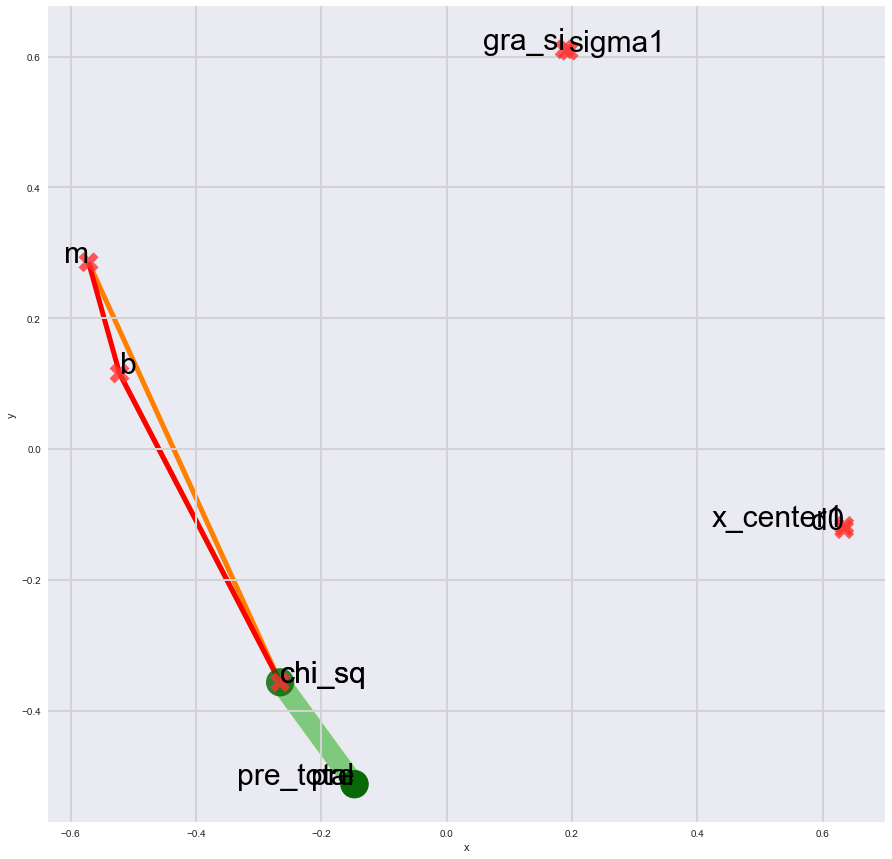

In [24]:
#Show MDS for MIC and pearson
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(sharex=True,figsize =(15,15))
axarr = plt.gca()
#axarr.set_facecolor((0.00, 0.05, 0.00))
#plt.axis('Off')
sns.set_style("whitegrid")
axarr.grid(False)

p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", scatter_kws={'facecolors':df['color'],'s':df['size']},ax = axarr)
for line in range(0,df.shape[0]):
    if line % 2 == 0:
        p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size=30, color='black')
    else:
        p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='left', size=30, color='black')
        
p1=sns.regplot(data=df1, x="x", y="y", fit_reg=False, marker="X", scatter_kws={'facecolors':df1['color'],'s':df1['size']},ax = axarr)
for line in range(0,df1.shape[0]):
    if line % 2 == 0:
        p1.text(df1.x[line], df1.y[line], df1.group[line], horizontalalignment='right', size=30, color='black')
    else:
        p1.text(df1.x[line], df1.y[line], df1.group[line], horizontalalignment='left', size=30, color='black')
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments1 = [[features_transpose_transform_MIC[i, :], features_transpose_transform_MIC[j, :]]
            for i in (2,7)for j in (8,2,7)]
values = np.abs(np.array(dissimilar))
lc1 = LineCollection(segments1,
                    zorder=0, cmap=plt.cm.autumn,
                    norm=plt.Normalize(0, values.max()*2))
lc1.set_array(np.array(1-dissimilar).flatten())
lc1.set_linewidths( 5 * np.ones(len(segments1)))
axarr.add_collection(lc1)
segments = [[features_transpose_transform_MIC[i, :], features_transpose_transform_MIC[j, :]]
            for i in (0,2,5)for j in (0,2,5)]
values = np.abs(np.array(dissimilar))
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Accent,
                    norm=plt.Normalize(0, values.max()*2))
lc.set_array(np.array(1-dissimilar).flatten())
lc.set_linewidths(20 * np.ones(len(segments)))
sns.set_style("whitegrid")
axarr.add_collection(lc)
axarr.grid(color='#D3D3D3', linestyle='-', linewidth=2)
#axarr.set_facecolor((1, 1, 1))
plt.savefig('/Users/shruti6991/Desktop/523project/MICwithPearsonsign_MDS1.png')


In [58]:
pairs_of_features = [[features_transpose_transform_MIC[i, :], features_transpose_transform_MIC[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]

In [59]:
for x in range(len(pairs_of_features)):
    pairs_of_features[x][0] = list(pairs_of_features[x][0])
    pairs_of_features[x][1] = list(pairs_of_features[x][1])

In [60]:
df = pd.DataFrame(pairs_of_features)

In [61]:
a = df[0].apply(pd.Series)
b = df[1].apply(pd.Series)
df2 = pd.DataFrame(columns = ['x1', 'y1','x2','y2','c','color'])

In [62]:
df2

,x1,y1,x2,y2,c,color


In [63]:
df2['x1'] = a[0]
df2['y1'] = a[1]
df2['x2'] = b[0]
df2['y2'] = b[1]
df2['c'] = 0.5
df2['color'] = '#006400'


,x1,y1,x2,y2,c,color
0,-0.146927,-0.512338,-0.146927,-0.512338,0.5,#006400
1,-0.146927,-0.512338,0.634484,-0.122440,0.5,#006400
2,-0.146927,-0.512338,-0.265583,-0.356623,0.5,#006400
3,-0.146927,-0.512338,0.188509,0.611156,0.5,#006400
4,-0.146927,-0.512338,0.194779,0.608972,0.5,#006400
5,-0.146927,-0.512338,-0.146927,-0.512338,0.5,#006400
6,-0.146927,-0.512338,0.634847,-0.117429,0.5,#006400
7,-0.146927,-0.512338,-0.521839,0.115529,0.5,#006400
8,-0.146927,-0.512338,-0.571344,0.285511,0.5,#006400
9,0.634484,-0.122440,-0.146927,-0.512338,0.5,#006400


In [74]:
for x in range(len(df2)):
    if x < 9:
        df2['color'][x] = 'bo'
    elif x < 18:
        df2['color'][x] = 'go'
    elif x < 27:
        df2['color'][x] = 'bo'
    elif x < 36:
        df2['color'][x] = 'go'
    elif x < 45:
        df2['color'][x] = 'go'
    elif x < 54:
        df2['color'][x] = 'bo'
    elif x < 63:
        df2['color'][x] = 'go'
    elif x < 72:
        df2['color'][x] = 'go'
    elif x < 81:
        df2['color'][x] = 'go'

/Users/shruti6991/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shruti6991/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shruti6991/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shruti6

In [83]:
def plot(a1,b1,a2,b2,c,col):
    # Compute ellipse parameters
    a = c / 2                                # Semimajor axis
    x0 = (a1 + a2) / 2                       # Center x-value
    y0 = (b1 + b2) / 2                       # Center y-value
    f = np.sqrt((a1 - x0)**2 + (b1 - y0)**2) # Distance from center to focus
    b = np.sqrt(a**2 - f**2)                 # Semiminor axis
    phi = np.arctan2((b2 - b1), (a2 - a1))   # Angle betw major axis and x-axis
    # Parametric plot in t
    resolution = 1000
    t = np.linspace(0, 2*np.pi, resolution)
    x = x0 + a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi)
    y = y0 + a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi)
    # Plot ellipse
    plt.plot(x, y)
    # Show focii
    plt.plot(a1, b1,col,markersize=20)
    plt.plot(a2, b2,col)
    plt.axis('equal')

/Users/shruti6991/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


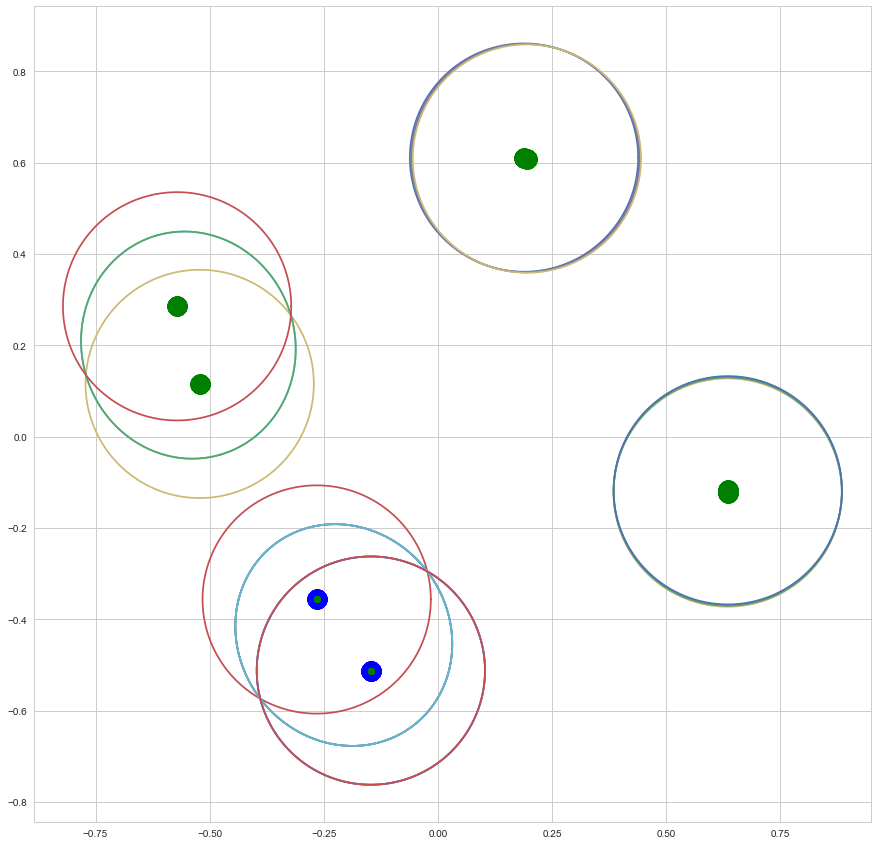

In [86]:
fig, axarr = plt.subplots(sharex=True,figsize =(15,15))
for x in range(len(df2)):
    plot(df2['x1'][x],df2['y1'][x],df2['x2'][x],df2['y2'][x],df2['c'][x],df2['color'][x])
plt.show()
for line in range(0,df.shape[0]):
    if line % 2 == 0:
        p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size=30, color='black')
    else:
        p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='left', size=30, color='black')

# 2D scatter plot between Peak_b, peak_chi and peak_prefactor

In [ ]:
peaks_dataframe = linecut_metadata_merge_normalized.copy()
peaks_dataframe = peaks_dataframe.drop(['fit_peaks_d0','fit_peaks_grain_size',
                                                       'fit_peaks_sigma1','fit_peaks_prefactor_total',
                                                       'fit_peaks_x_center1','fit_peaks_m'
                                                  ,'annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(peaks_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g = g.savefig('/Users/shruti6991/Desktop/523project/peaks_pair_wise_plot.png')


# 2D scatter plot between Peak_prefactor and sigma1

In [ ]:
peaks_dataframe = linecut_metadata_merge_normalized.copy()
peaks_dataframe = peaks_dataframe.drop(['fit_peaks_d0','fit_peaks_grain_size',
                                                       'fit_peaks_b','fit_peaks_prefactor_total',
                                                       'fit_peaks_x_center1','fit_peaks_chi_squared','fit_peaks_m'
                                                  ,'annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(peaks_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/peaks_prefactor_sigma1_plot.png')


# 2D scatter plot between Peak_sigma1 and d0

In [ ]:
peaks_dataframe = linecut_metadata_merge_normalized.copy()
peaks_dataframe = peaks_dataframe.drop(['fit_peaks_grain_size','fit_peaks_prefactor1',
                                                       'fit_peaks_b','fit_peaks_prefactor_total',
                                                       'fit_peaks_x_center1','fit_peaks_chi_squared','fit_peaks_m'
                                                  ,'annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(peaks_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/peaks_sigma1_d0_plot.png')


# 2D scatter plot between Peak_b and peak_m

In [ ]:
peaks_b_peaks_m_dataframe = linecut_metadata_merge_normalized.copy()
peaks_b_peaks_m_dataframe = peaks_b_peaks_m_dataframe.drop(['fit_peaks_d0','fit_peaks_grain_size',
                                                       'fit_peaks_sigma1','fit_peaks_prefactor_total',
                                                       'fit_peaks_x_center1','fit_peaks_chi_squared',
                                                       'fit_peaks_prefactor1','annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(peaks_b_peaks_m_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/peaks_b_peaks_m_pair_wise_plot.png')


# 2D scatter plot between Peak_d0 and peak_center

In [ ]:
peaks_d0_peaks_center_dataframe = linecut_metadata_merge_normalized.copy()
peaks_d0_peaks_center_dataframe = peaks_d0_peaks_center_dataframe.drop(['fit_peaks_m','fit_peaks_grain_size',
                                                       'fit_peaks_sigma1','fit_peaks_prefactor_total',
                                                       'fit_peaks_b','fit_peaks_chi_squared',
                                                       'fit_peaks_prefactor1','annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(peaks_d0_peaks_center_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/peaks_d0_peaks_center_pair_wise_plot.png')

# 2D scatter plot between Peak_d0 and peak_prefactor

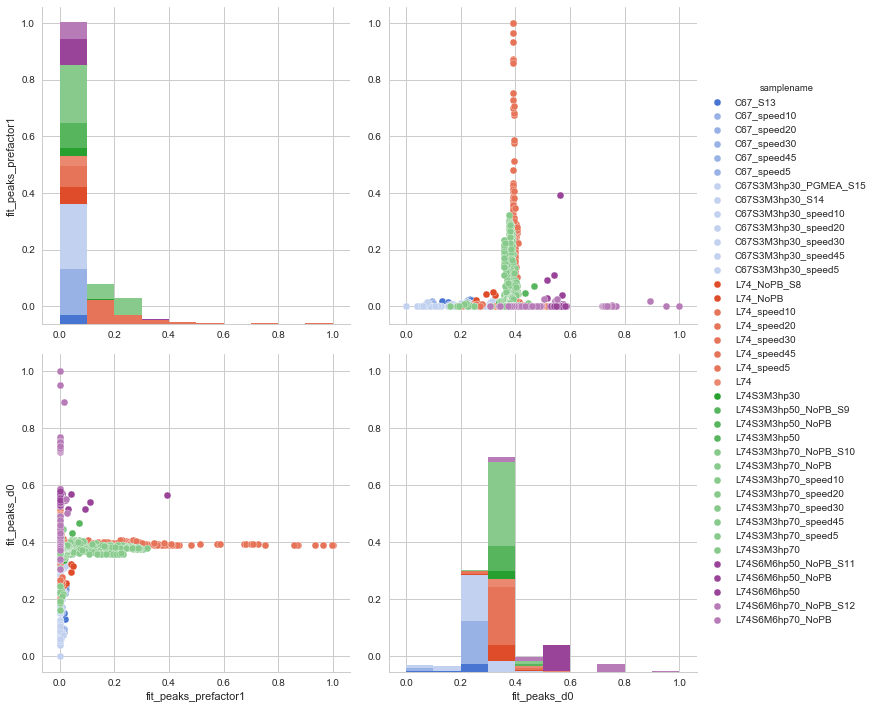

In [31]:
#fig, axarr = plt.subplots(sharex=True,figsize =(8,8))
d0_prefactor_dataframe = linecut_metadata_merge_normalized.copy()
d0_prefactor_dataframe = d0_prefactor_dataframe.drop(['fit_peaks_m','fit_peaks_grain_size',
                                                       'fit_peaks_sigma1','fit_peaks_prefactor_total',
                                                       'fit_peaks_b','fit_peaks_chi_squared',
                                                       'fit_peaks_x_center1','annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(d0_prefactor_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=1)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/d0_prefactor_pair_wise_plot.png')

# 2D scatter plot between Peak_prefactor1 and Peak_prefactor_total

In [ ]:
prefactor_total_dataframe = linecut_metadata_merge_normalized.copy()
prefactor_total_dataframe = prefactor_total_dataframe.drop(['fit_peaks_m','fit_peaks_grain_size',
                                                       'fit_peaks_sigma1','fit_peaks_d0',
                                                       'fit_peaks_b','fit_peaks_chi_squared',
                                                       'fit_peaks_x_center1','annealing_time'], axis=1)
#pairwise_plot_dataframe = pairwise_plot_dataframe.set_index('samplename')
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]
g = sns.pairplot(prefactor_total_dataframe,hue = "samplename",palette =palette_list,size=5, aspect=9/7)
sns.set_style("whitegrid")
g.savefig('/Users/shruti6991/Desktop/523project/prefactor1_prefactortotal_pair_wise_plot.png')

# 2D graph between Peak_sigma1 and annealing_time

In [ ]:
# create dataframes for each sample
C67_S13 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_S13")]
C67_speed10 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_speed10")]
C67_speed20 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_speed20")]
C67_speed30 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_speed30")]
C67_speed45 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_speed45")]
C67_speed5 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67_speed5")]
C67S3M3hp30_PGMEA_S15 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_PGMEA_S15")]
C67S3M3hp30_S14 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_S14")]
C67S3M3hp30_speed10 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_speed10")]
C67S3M3hp30_speed20 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_speed20")]
C67S3M3hp30_speed30 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_speed30")]
C67S3M3hp30_speed45 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_speed45")]
C67S3M3hp30_speed5 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("C67S3M3hp30_speed5")]

In [ ]:
L74_NoPB = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_NoPB")]
L74_speed10 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_speed10")]
L74_speed20 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_speed20")]
L74_speed30 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_speed30")]
L74_speed45 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_speed45")]
L74_speed5 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74_speed5")]
L74 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74")]
L74S3M3hp30 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp30")]
L74S3M3hp50_NoPB = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp50_NoPB")]
L74S3M3hp50 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp50")]
L74S3M3hp70_NoPB = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_NoPB")]
L74S3M3hp70 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70")]
L74S3M3hp70_speed10 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_speed10")]
L74S3M3hp70_speed20 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_speed20")]
L74S3M3hp70_speed30 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_speed30")]
L74S3M3hp70_speed45 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_speed45")]
L74S3M3hp70_speed5 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S3M3hp70_speed5")]
L74S6M6hp50 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S6M6hp50")]
L74S6M6hp70 = linecut_metadata_merge_normalized.loc[linecut_metadata_merge_normalized['samplename'].str.contains("L74S6M6hp70")]

In [ ]:
unique_sample_list = [C67_S13,C67_speed10,C67_speed20,C67_speed30,C67_speed45,C67_speed5,
                      C67S3M3hp30_PGMEA_S15,C67S3M3hp30_S14,C67S3M3hp30_speed10,
                      C67S3M3hp30_speed20,C67S3M3hp30_speed30,C67S3M3hp30_speed45,
                      C67S3M3hp30_speed5,L74_NoPB,L74_speed10,L74_speed20,L74_speed30,
                     L74_speed45,L74_speed5,L74,L74S3M3hp30,L74S3M3hp50_NoPB,L74S3M3hp50,
                     L74S3M3hp70_NoPB,L74S3M3hp70,L74S3M3hp70_speed10,L74S3M3hp70_speed20,
                     L74S3M3hp70_speed30,L74S3M3hp70_speed45,L74S3M3hp70_speed5,L74S6M6hp50,L74S6M6hp70]



In [ ]:
string_sample_list = ['C67_S13','C67_speed10','C67_speed20','C67_speed30','C67_speed45','C67_speed5',
                      'C67S3M3hp30_PGMEA_S15','C67S3M3hp30_S14','C67S3M3hp30_speed10',
                      'C67S3M3hp30_speed20','C67S3M3hp30_speed30','C67S3M3hp30_speed45',
                      'C67S3M3hp30_speed5','L74_NoPB','L74_speed10','L74_speed20','L74_speed30',
                     'L74_speed45','L74_speed5','L74','L74S3M3hp30','L74S3M3hp50_NoPB','L74S3M3hp50',
                     'L74S3M3hp70_NoPB','L74S3M3hp70','L74S3M3hp70_speed10','L74S3M3hp70_speed20',
                     'L74S3M3hp70_speed30','L74S3M3hp70_speed45','L74S3M3hp70_speed5','L74S6M6hp50','L74S6M6hp70']

In [ ]:
def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

In [ ]:
i = 0
count_strict = 0
count_nonstrict = 0
for x in unique_sample_list :
    plt.plot(sorted(x['annealing_time']),x['fit_peaks_sigma1'])
    if x['fit_peaks_sigma1'].is_monotonic_decreasing:
        count_strict = count_strict +1
    if non_decreasing(x['fit_peaks_sigma1']):
        count_nonstrict = count_nonstrict + 1
    plt.xlabel("annealing_time")
    plt.ylabel("fit_peaks_sigma1")
    plt.title(string_sample_list[i])
    #plt.savefig('/Users/shruti6991/Desktop/523project/C67_S13_peak_sigma1_2D_graph.png')
    plt.show()
    i = i+1
print(count_strict)
print(count_nonstrict)
print(i)

C67_S13, C67_speed,L74_NoPB, L74

In [ ]:
#Plot the 2D graph
i = 0
fig, ax = plt.subplots(figsize=(40,20))
plt.gca().set_color_cycle(["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#b77cb7"])

c = 0
for x in unique_sample_list:
    x = x.sort_values('annealing_time')
    #plt.line(x['annealing_time'],x['fit_peaks_sigma1'])
    plt.plot(x['annealing_time'],x['fit_peaks_sigma1'])
    plt.xlabel("annealing_time")
    plt.ylabel("fit_peaks_sigma1")

plt.legend(string_sample_list)
plt.savefig('/Users/shruti6991/Desktop/523project/peak_sigma1_2D_graph.png')
ax.set_axis_bgcolor("white")

# Sample Prefix

In [69]:
path = '/Users/shruti6991/Desktop/523project/thumbnails'
allfiles=os.listdir(path)
C67_files = [f for f in allfiles if "C67" in f]
L74_files = [f for f in allfiles if "L74" in f]
L74S3M3hp30files = [f for f in allfiles if "L74S3M3hp30" in f]

# Average Image

In [100]:

def average_img_3(imlist):
    # Build up average pixel intensities, casting each image as an array of floats
    w,h=250,190
    print(w,h)
    N=len(imlist)
    arr=numpy.zeros((h,w,3),numpy.float)
    for im in imlist:
        image = cv2.imread(path + '/' + im)
        roi_image = image[210:400, 200:450]
        imarr=numpy.array(roi_image,dtype=numpy.float)
        arr=arr+imarr
    arr = arr/N
    arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)
    return arr


250 190
250 190


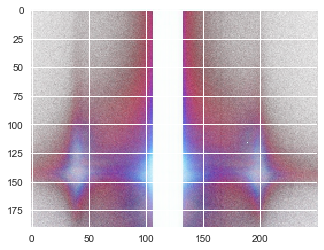

In [101]:
img = Image.fromarray(average_img_3(C67_files[:100]), mode = 'RGB')
plt.imsave('/Users/shruti6991/Desktop/523project/C67Average.png', average_img_3(C67_files))

In [ ]:
cmap = plt.cm.gnuplot
#imshow(cm(average_img_3(C67_files)))
plt.imsave('/Users/shruti6991/Desktop/523project/L74Average.png', average_img_3(L74_files))

In [ ]:
cmap = plt.cm.gnuplot
#imshow(cm(average_img_3(L74_files)))
plt.imsave('/Users/shruti6991/Desktop/523project/L74S3M3hp30filesAverage.png', cmap(average_img_3(L74S3M3hp30files)))

In [ ]:
def variance_img_3(imlist):
    # Build up average pixel intensities, casting each image as an array of floats
    w,h=250,190
    print(w,h)
    N=len(imlist)
    arr=numpy.zeros((h,w,3),numpy.float)
    for im in imlist:
        image = cv2.imread(path + '/' + im)
        roi_image = image[210:400, 200:450]
        imarr=numpy.array(roi_image,dtype=numpy.float)
        arr=arr+imarr
    arr = arr/N
    arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)
    return arr

# Entropy and variance for C67 files

In [ ]:
from os import listdir
from os.path import isfile, join
jpg_files = [f for f in listdir('/Users/shruti6991/Desktop/523project/thumbnails') if 
              isfile(join('/Users/shruti6991/Desktop/523project/thumbnails', f))]
less_sigma_sample = linecut_metadata_merge_normalized[linecut_metadata_merge_normalized['fit_peaks_sigma1']<=0.1]
less_sigma_list = []
for x in less_sigma_sample['item']:
    less_sigma_list.append(x +  ".jpg")
less_sigma_common_files = set(jpg_files)&set(less_sigma_list) # we don't need to list3 to actually be a list
less_sigma_common_files_C67 =  [f for f in less_sigma_common_files if f.startswith("C67")]

In [ ]:
more_sigma_sample = linecut_metadata_merge_normalized[linecut_metadata_merge_normalized['fit_peaks_sigma1']>0.1]
more_sigma_list = []
for x in more_sigma_sample['item']:
    more_sigma_list.append(x + ".tiff")
more_sigma_common_files = set(tiff_files)&set(more_sigma_list) # we don't need to list3 to actually be a list
more_sigma_common_files_C67 = [f for f in more_sigma_common_files if f.startswith("C67")]

In [88]:
pixel_location_n_images = [[]]
cm = plt.get_cmap('gnuplot')
i = 0
#Append the pixel data for each image in pixel_location_n_images (90 X 301453 )
for im in C67_files[:100]:
    image = cv2.imread(path + '/' + im)
    roi_image = image[210:400, 200:450]
    imarr=np.array(roi_image,dtype = np.float)
    image = Image.fromarray(imarr, mode = 'RGB')
    pix_val = list(image.getdata())
    i = i + 1
    pixel_location_n_images.append(pix_val)
pixel_location_n_images = [x for x in pixel_location_n_images if x != []]

#Transpose the list to make it, (301453 X 90)
t = [list(i) for i in zip(*pixel_location_n_images)]
image = np.array(t)


# Entropy

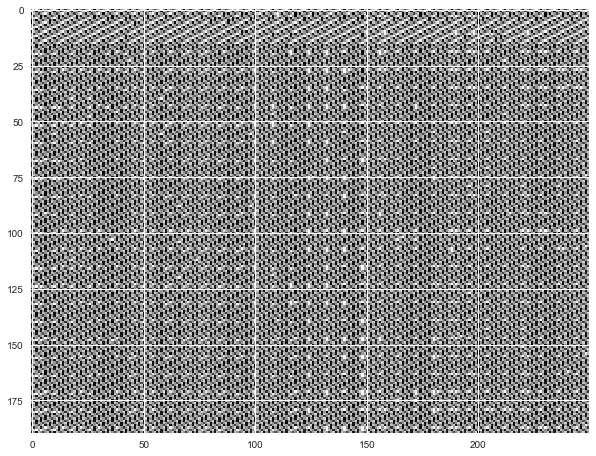

In [90]:
#Calculate the entropy of each pixel location
fig, axarr = plt.subplots(sharex=True,figsize =(10,10))
def entropy(img):
        image = Image.fromarray(img, mode = 'RGB')
        histogram = image.histogram()
        histogram_length = sum(histogram)
        samples_probability = [float(h) / histogram_length for h in histogram]
        return -sum([p * math.log(p, 2) for p in samples_probability if p != 0])

#Calculate entropy of all pixel locations
entropy_list = dict()
for x in range(len(image)):
    entropy_list[x]= entropy(image[x]) 


#Create image from the entropy value
pixel_array = []
for x in entropy_list.keys():
    pixel_array.append(entropy_list[x])
    
width = 190
height  = 250
def create_arr(width, height):
    i = 0
    bin_array = np.zeros((width, height,3), dtype=np.float)
    for x in range(0, width):
        for y in range(0, height):
            bin_array[x, y] = pixel_array[i] 
            i = i+1
    return bin_array

# Save array
bin_array = create_arr(190, 250) 
imshow(bin_array)

In [91]:
image = np.array(Image.fromarray(bin_array, mode = 'RGB'))
hist = cv2.calcHist([image],[0],None,[256],[0,256])

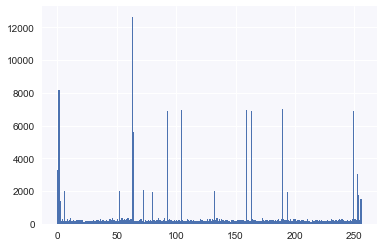

In [92]:
plt.hist(image.ravel(),256,[0,256]); plt.show()

In [104]:
path = '/Users/shruti6991/Desktop/imagedata'
allfiles=os.listdir(path)

In [107]:
del allfiles[0]

In [108]:
allfiles

['IMG_2703.jpg',
 'IMG_2717.JPG',
 'IMG_2702.jpg',
 'IMG_2706.jpg',
 'IMG_2707.jpg',
 'IMG_2698.jpg',
 'DSC_0308.JPG',
 'IMG_2705.jpg',
 'IMG_2704.jpg',
 'IMG_2696.jpg',
 'DSC_0310.JPG',
 'IMG_2721.jpg',
 'DSC_0311.JPG',
 'IMG_2697.jpg',
 'IMG_2695.jpg',
 'IMG_2718.jpg']

In [ ]:
mean = 0.0   # some constant
std = 1.0    # some constant (standard deviation)
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255)

In [118]:
image = cv2.imread(path + '/' + allfiles[0])
height, width = image.shape[:2]
height, width

(2576, 1932)

In [ ]:
pixel_location_n_images = [[]]
cm = plt.get_cmap('gnuplot')
i = 0
mean = 0
std = 1
#Append the pixel data for each image in pixel_location_n_images (90 X 301453 )
for im in allfiles:
    image = cv2.imread(path + '/' + im)
    roi_image = image[210:400, 200:450]
    noisy_img = roi_image + np.random.normal(mean, std, roi_image.shape)
    image[210:400,200:450] = noisy_img
    imarr=np.array(image,dtype = np.float)
    image = Image.fromarray(imarr, mode = 'RGB')
    pix_val = list(image.getdata())
    i = i + 1
    pixel_location_n_images.append(pix_val)
pixel_location_n_images = [x for x in pixel_location_n_images if x != []]

#Transpose the list to make it, (301453 X 90)
t = [list(i) for i in zip(*pixel_location_n_images)]
image = np.array(t)

In [114]:
image.shape 

(47500, 16, 3)

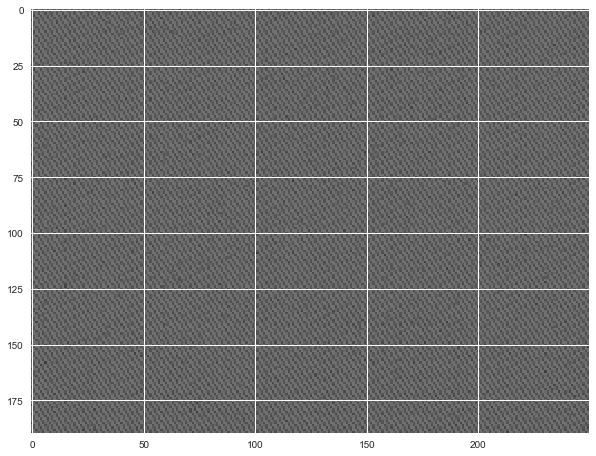

In [111]:
#Calculate the entropy of each pixel location
fig, axarr = plt.subplots(sharex=True,figsize =(10,10))
def entropy(img):
        image = Image.fromarray(img, mode = 'RGB')
        histogram = image.histogram()
        histogram_length = sum(histogram)
        samples_probability = [float(h) / histogram_length for h in histogram]
        return -sum([p * math.log(p, 2) for p in samples_probability if p != 0])

#Calculate entropy of all pixel locations
entropy_list = dict()
for x in range(len(image)):
    entropy_list[x]= entropy(image[x]) 

#Create image from the entropy value
pixel_array = []
for x in entropy_list.keys():
    pixel_array.append(entropy_list[x])
    
width = 450
height  = 400
def create_arr(width, height):
    i = 0
    bin_array = np.zeros((width, height,3), dtype=np.float)
    for x in range(0, width):
        for y in range(0, height):
            bin_array[x, y] = pixel_array[i] 
            i = i+1
    return bin_array

# Save array
bin_array = create_arr(450, 400) 
imshow(bin_array)

# Variance

In [ ]:
#Calculate the variance of each pixel location
fig, axarr = plt.subplots(sharex=True,figsize =(10,10))
def image_variance(img):
    image = Image.fromarray(img, mode = 'RGB')
    return ndimage.variance(img)

#Calculate variance of all pixel locations
variance_list = dict()
for x in range(len(image)):
    variance_list[x]= entropy(image[x]) 

#Create image from the variance value
pixel_array = []
for x in variance_list.keys():
    pixel_array.append(variance_list[x])
width = 190
height  = 250
def create_arr(width, height):
    i = 0
    bin_array = np.zeros((width, height,3), dtype=np.float)
    for x in range(0, width):
        for y in range(0, height):
            bin_array[x, y] = pixel_array[i] 
            i = i+1
    return bin_array

# Save array
bin_array = create_arr(190, 250) 
imshow(bin_array)
#plt.imsave('/Users/shruti6991/Desktop/523project/variance_c67.png', bin_array)

MDS for sample_prefix

In [ ]:
# Only include linecut features as setA for MDS
linecut_metadata_merge_normalized_copy = linecut_metadata_merge_normalized.copy()
setA_peak_features = linecut_metadata_merge_normalized_copy.drop(['samplename','annealing_time'], axis=1)

#MDS creating using euclidean distance
mds = MDS(n_components = 2, dissimilarity='euclidean')

#Create another dataframe for reduced features which acts as set B
d = {'fit_peaks_prefactor1': setA_peak_features['fit_peaks_prefactor1'], 'fit_peaks_d0': setA_peak_features['fit_peaks_d0'],
    'fit_peaks_sigma1':setA_peak_features['fit_peaks_sigma1'],'fit_peaks_chi_squared' :setA_peak_features['fit_peaks_chi_squared'],
    'fit_peaks_b':setA_peak_features['fit_peaks_b']}
setB_peak_features = pd.DataFrame(data=d)

# Palette with blue shade for C67 and red shade for L74
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]

In [ ]:
# Transform set A for MDS and save it's embedding
setA_peak_features_transform_mds = mds.fit_transform(setA_peak_features)
pos_mds = mds.fit(setA_peak_features_transform_mds).embedding_

# Transform set B for MDS and use it's embedding from pos
setB_peak_features_transform_mds = mds.fit_transform(setB_peak_features)
npos_mds = mds.fit_transform(setB_peak_features_transform_mds, init=pos_mds)

In [ ]:
#Plot the set A graph
setA_dimension1_mds_sample_prefix = []
setA_dimension2_mds_sample_prefix = []

for i in range(1801):
    setA_dimension1_mds_sample_prefix.append(pos_mds[i][0])
    setA_dimension2_mds_sample_prefix.append(pos_mds[i][1])
    
setA_sample_prefix_mds = pd.DataFrame({
'Dimension1':setA_dimension1_mds_sample_prefix,    
'Dimension2':setA_dimension2_mds_sample_prefix,
'Samples' : samplename_list
})
sns.set_style("whitegrid")
setA_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_sample_prefix_mds, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setA_plot.savefig('/Users/shruti6991/Desktop/523project/name_mds_setA.png')


sns.set_style("whitegrid")
#Plot the set B graph
setB_dimension1_mds_sample_prefix = []
setB_dimension2_mds_sample_prefix = []

for i in range(1801):
    setB_dimension1_mds_sample_prefix.append(npos_mds[i][0])
    setB_dimension2_mds_sample_prefix.append(npos_mds[i][1])

setB_sample_prefix_mds = pd.DataFrame({
'Dimension1':setB_dimension1_mds_sample_prefix,    
'Dimension2':setB_dimension2_mds_sample_prefix,
'Samples' : samplename_list
})
setB_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setB_sample_prefix_mds, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setB_plot.savefig('/Users/shruti6991/Desktop/523project/name_mds_setB.png')
sns.set_style("whitegrid")

T-SNE for sample prefix

In [ ]:
# TSNE for set A
setA_tsne = TSNE(n_components=2)
setA_peak_features_transform_tsne = setA_tsne.fit_transform(setA_peak_features)
pos_tsne = setA_tsne.fit(setA_peak_features_transform_tsne).embedding_

#TSNE for set B
setB_tsne = TSNE(n_components=2,init = pos_tsne)
setB_peak_features_transform_tsne = setB_tsne.fit_transform(setB_peak_features)
npos_tsne = setB_tsne.fit_transform(setB_peak_features_transform_tsne)

In [ ]:
#Plot the set A graph
setA_dimension1_tsne_sample_prefix = []
setA_dimension2_tsne_sample_prefix = []

for i in range(1801):
    setA_dimension1_tsne_sample_prefix.append(pos_tsne[i][0])
    setA_dimension2_tsne_sample_prefix.append(pos_tsne[i][1])
    
setA_sample_prefix_tsne = pd.DataFrame({
'Dimension1':setA_dimension1_tsne_sample_prefix,    
'Dimension2':setA_dimension2_tsne_sample_prefix,
'Samples' : samplename_list
})
setA_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_sample_prefix_tsne, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setA_plot.savefig('/Users/shruti6991/Desktop/523project/name_tsne_setA.png')

#Plot the set B graph
setB_dimension1_tsne_sample_prefix = []
setB_dimension2_tsne_sample_prefix = []

for i in range(1801):
    setB_dimension1_tsne_sample_prefix.append(npos_tsne[i][0])
    setB_dimension2_tsne_sample_prefix.append(npos_tsne[i][1])

setB_sample_prefix_tsne = pd.DataFrame({
'Dimension1':setB_dimension1_tsne_sample_prefix,    
'Dimension2':setB_dimension2_tsne_sample_prefix,
'Samples' : samplename_list
})
setB_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setB_sample_prefix_tsne, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setB_plot.savefig('/Users/shruti6991/Desktop/523project/name_tsne_SetB.png')

# K means clustering

MDS for K means

In [ ]:
palette_list = ["#4775d1", 
                "#994499",
                "#27a02f",
                "#df4c29",
                "#e67459", 
                "#ea8870",
                "#27a02f",
                "#57b55d",
                "#87ca8b",
                "#994499",
                "#b77cb7",]

In [ ]:
clmns_mds = ['dimension1','dimension2']
setA_kmeans_mds = KMeans(n_clusters=5)
setB_kmeans_mds = KMeans(n_clusters = 5)

#Transform
setA_kmeans_mds = setA_kmeans_mds.fit(setA_peak_features_transform_mds)
setB_kmeans_mds = setB_kmeans_mds.fit(setB_peak_features_transform_mds)

# Getting the cluster labels
setA_labels_mds = setA_kmeans_mds.predict(setA_peak_features_transform_mds)
setB_labels_mds = setB_kmeans_mds.predict(setB_peak_features_transform_mds)

# Centroid values
setA_centroids_mds = setA_kmeans_mds.cluster_centers_
setB_centroids_mds = setB_kmeans_mds.cluster_centers_

#Add the column into our list
clmns_mds.extend(['clusters'])

In [ ]:
setA_Kmeans_mds = pd.DataFrame({
'Dimension1':setA_dimension1_mds_sample_prefix,    
'Dimension2':setA_dimension2_mds_sample_prefix,
'Clusters' : setA_labels_mds
#'Centroids': setA_centroids_mds
})

setA_plot_kmeans_mds = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_Kmeans_mds, hue='Clusters',
                       palette=palette_list,fit_reg=False,size=13, aspect=9/7, legend_out=False,
                       scatter_kws={"s": 40,'alpha':1.0})
setA_plot_kmeans_mds.savefig('/Users/shruti6991/Desktop/523project/cluster_mds_setA.png')

#plt.scatter(result['centroid_x'], result['centroid_y'], c = 'gray',marker = "*")

#for i, txt in enumerate(result['samplename']):
#    plt.annotate(txt, (result['centroid_x'][i],result['centroid_y'][i]))
#setA_plot_kmeans_mds.savefig('/Users/shruti6991/Desktop/523project/cluster_mds_setA.png')


   
setB_Kmeans_mds = pd.DataFrame({
'Dimension1':setB_dimension1_mds_sample_prefix,    
'Dimension2':setB_dimension2_mds_sample_prefix,
'Clusters' : setB_labels_mds
#'Centroids' : setB_centroids_mds
})

setB_plot_kmeans_mds = sns.lmplot(x='Dimension1' , y='Dimension2', data=setB_Kmeans_mds, hue='Clusters',
                       palette=palette_list,fit_reg=False,size=13, aspect=9/7, legend_out=False,
                       scatter_kws={"s": 40,'alpha':1.0})
setB_plot_kmeans_mds.savefig('/Users/shruti6991/Desktop/523project/cluster_mds_setB.png')

In [ ]:
Z = pd.DataFrame(setA_kmeans_mds.cluster_centers_[setA_Kmeans_mds['Clusters']], 
                 columns=['centroid_x', 'centroid_y'])
result = pd.concat([setA_Kmeans_mds,Z], axis=1)
result['samplename'] = samplename_list
result['diff'] = abs(abs(result['centroid_x'] - result['Dimension1']) + abs(result['centroid_y'] - result['Dimension2']))
#result = result.set_index('samplename')
result[result['diff'].isin(result.groupby('Clusters').min()['diff'].values)]

# TSNE for k means

In [ ]:
clmns_tsne = ['dimension1','dimension2']
setA_kmeans_tsne = KMeans(n_clusters=5)
setB_kmeans_tsne = KMeans(n_clusters = 5)

#Transform
setA_kmeans_tsne = setA_kmeans_tsne.fit(setA_peak_features_transform_tsne)
setB_kmeans_tsne = setB_kmeans_tsne.fit(setB_peak_features_transform_tsne)

# Getting the cluster labels
setA_labels_tsne = setA_kmeans_tsne.predict(setA_peak_features_transform_tsne)
setB_labels_tsne = setB_kmeans_tsne.predict(setB_peak_features_transform_tsne)

# Centroid values
setA_centroids_tsne = setA_kmeans_tsne.cluster_centers_
setB_centroids_tsne = setB_kmeans_tsne.cluster_centers_

#Add the column into our list
clmns_tsne.extend(['clusters'])

In [ ]:
setA_Kmeans_tsne = pd.DataFrame({
'Dimension1':setA_dimension1_tsne_sample_prefix,    
'Dimension2':setA_dimension2_tsne_sample_prefix,
'Clusters' : setA_labels_tsne
})

setA_plot_kmeans_tsne = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_Kmeans_tsne, hue='Clusters',
                       palette=palette_list,fit_reg=False,size=13, aspect=9/7, legend_out=False,
                       scatter_kws={'s': 40,'alpha':1.0})
#setA_plot_kmeans_tsne.lmplot(x='Dimension1' , y='Dimension2', data = centroid)
#plt.scatter(result['centroid_x'], result['centroid_y'], c = 'gray',marker = "*")

#for i, txt in enumerate(result['samplename']):
#    plt.annotate(txt, (result['centroid_x'][i],result['centroid_y'][i]))
#setA_plot_kmeans_tsne.savefig('/Users/shruti6991/Desktop/523project/cluster_tsne_setA.png')


  
setB_Kmeans_tsne = pd.DataFrame({
'Dimension1':setB_dimension1_tsne_sample_prefix,    
'Dimension2':setB_dimension2_tsne_sample_prefix,
'Clusters' : setB_labels_tsne
})



setB_plot_kmeans_tsne = sns.lmplot(x='Dimension1' , y='Dimension2', data=setB_Kmeans_tsne, hue='Clusters',
                       palette=palette_list,fit_reg=False,size=13, aspect=9/7, legend_out=False,
                       scatter_kws={"s": 40,'alpha':1.0})

setB_plot_kmeans_tsne.savefig('/Users/shruti6991/Desktop/523project/cluster-tsne_setB.png')



In [ ]:
Z = pd.DataFrame(setA_kmeans_tsne.cluster_centers_[setA_Kmeans_tsne['Clusters']], 
                 columns=['centroid_x', 'centroid_y'])
result = pd.concat([setA_Kmeans_tsne,Z], axis=1)
result['samplename'] = samplename_list
result['diff'] = abs(abs(result['centroid_x'] - result['Dimension1']) + abs(result['centroid_y'] - result['Dimension2']))
#result = result.set_index('samplename')
result[result['diff'].isin(result.groupby('Clusters').min()['diff'].values)]

# DBSCAN

In [ ]:
palette_list = ["#4775d1", 
                "#99b2e5",
                "#c1d1ef",
                "#df4c29",
                "#e67459", 
                "#ea8870",
                "#27a02f",
                "#57b55d",
                "#87ca8b",
                "#994499",
                "#b77cb7"]

In [ ]:
db = DBSCAN(eps=0.1, min_samples=10).fit(setA_peak_features)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
setA_dbscan_labels = db.labels_
db.labels_
setA_DBSCAN_tsne = pd.DataFrame({
'Dimension1':setA_dimension1_tsne_sample_prefix,    
'Dimension2':setA_dimension2_tsne_sample_prefix,
'Clusters' : setA_dbscan_labels
})

setA_plot_dbscan_tsne = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_DBSCAN_tsne, hue='Clusters',
                       palette=palette_list,fit_reg=False,size=13, aspect=9/7, legend_out=False,
                       scatter_kws={'s': 40,'alpha':1.0})
#setA_plot_kmeans_tsne.lmplot(x='Dimension1' , y='Dimension2', data = centroid)
#plt.scatter(result['centroid_x'], result['centroid_y'], c = 'gray',marker = "*")


# Annealing time

In [ ]:
# Annealing time showing transparency
annealing_time_reduced_value = []
for x in linecut_metadata_merge_normalized['annealing_time']:
    annealing_time_reduced_value.append(x)

In [ ]:
dotcolors = []
# Setting color
dotcolors[:44]=[(0.4167, 0.0556, 0.5278, a) for a in annealing_time_reduced_value[:44]]
dotcolors[44:132]=[(0.4098, 0.0656, 0.52, a) for a in annealing_time_reduced_value[44:132]]
dotcolors[132:439]=[(0.3614, 0.2289, 0.4096, a) for a in annealing_time_reduced_value[132:439]]
dotcolors[439:521]=[(0.0, 0.0, 1, a) for a in annealing_time_reduced_value[439:521]]
dotcolors[521:827]=[(0.7567, 0.023, 0.2197, a) for a in annealing_time_reduced_value[521:827]]
dotcolors[827:872]=[(0.5484, 0.1763, 0.2753, a) for a in annealing_time_reduced_value[827:872]]
dotcolors[872:913]=[(0.5162, 0.1706, 0.3132, a) for a in annealing_time_reduced_value[872:913]]
dotcolors[913:995]=[(0.6043, 0.047, 0.3483, a) for a in annealing_time_reduced_value[913:995]]
dotcolors[995:1036]=[(0.4866, 0.1718, 0.3416, a) for a in annealing_time_reduced_value[995:1036]]
dotcolors[1036:1118]=[(0.7183, 0.1408, 0.1408, a) for a in annealing_time_reduced_value[1036:1118]]
dotcolors[1118:1423]=[(0.61, 0.3038, 0.0861, a) for a in annealing_time_reduced_value[1118:1423]]
dotcolors[1423:1464]=[(0.5247, 0.3128, 0.1626, a) for a in annealing_time_reduced_value[1423:1464]]
dotcolors[1464:1546]=[(0.5426, 0.4574, 0.0, a) for a in annealing_time_reduced_value[1464:1546]]
dotcolors[1546:1587]=[(0.4570, 0.4068, 0.1362, a) for a in annealing_time_reduced_value[1546:1587]]
dotcolors[1587:1669]=[(0.412, 0.3796, 0.2084, a) for a in annealing_time_reduced_value[1587:1669]]
dotcolors[1669:1801]=[(0.3685, 0.3540, 0.2775, a) for a in annealing_time_reduced_value[1669:1801]]

MDS for annealing time

In [ ]:
# For setting up legends
setA_annealing_time_mds = pd.DataFrame({
'Dimension1':setA_dimension1_mds_sample_prefix,    
'Dimension2':setA_dimension2_mds_sample_prefix,
'Samples' : samplename_list,
})

C67_S13 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[:44],s=70)
C67_speed = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[44:132],s=70)
C67S3M3hp30 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[132:439],s=70)
L74_NoPB = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[439:521],s=70)
L74_speed = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[521:827],s=70)
L74 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[827:872],s=70)
L74S3M3hp30 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[872:913],s=70)
L74S3M3hp50_NoPB = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[913:995],s=70)
L74S3M3hp50 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[995:1036],s=70)
L74S3M3hp70_NoPB = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1036:1118],s=70)
L74S3M3hp70_speed = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1118:1423],s=70)
L74S3M3hp70 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1423:1464],s=70)
L74S6M6hp50_NoPB = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1464:1546],s=70)
L74S6M6hp50 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1546:1587],s=70)
L74S6M6hp70_NoPB = plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1587:1669],s=70)
L74S6M6hp70 = plt.scatter(x = setA_annealing_time_mds['Dimension1'], 
                          y = setA_annealing_time_mds['Dimension2'],c = dotcolors[1669:1801],s=70)

fig, ax = plt.subplots(figsize=(20,20))

plt.legend((C67_13, C67_speed, C67S3M3hp30, L74_NoPB, L74_speed, L74, L74S3M3hp30,L74S3M3hp50_NoPB,
           L74S3M3hp50,L74S3M3hp70_NoPB, L74S3M3hp70_speed,L74S3M3hp70, L74S6M6hp50_NoPB , L74S6M6hp50,
           L74S6M6hp70_NoPB, L74S6M6hp70),
           ('C67_13', 'C67_speed', 'C67S3M3hp30', 'L74_NoPB', 'L74_speed', 'L74', 'L74S3M3hp30','L74S3M3hp50_NoPB',
           'L74S3M3hp50','L74S3M3hp70_NoPB', 'L74S3M3hp70_speed','L74S3M3hp70', 'L74S6M6hp50_NoPB' , 'L74S6M6hp50',
           'L74S6M6hp70_NoPB', 'L74S6M6hp70'),fontsize=10)
plt.scatter(x = setA_annealing_time_mds['Dimension1'], y = setA_annealing_time_mds['Dimension2'],
                     c = dotcolors,s=50)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.savefig('/Users/shruti6991/Desktop/523project/setA_annealing_time_mds.png')

TSNE for annealing time

In [ ]:
# For setting up legends
setA_annealing_time_tsne = pd.DataFrame({
'Dimension1':setA_dimension1_tsne_sample_prefix,    
'Dimension2':setA_dimension2_tsne_sample_prefix,
'Samples' : samplename_list,
})

C67_S13 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[:44],s=70)
C67_speed = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[44:132],s=70)
C67S3M3hp30 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[132:439],s=70)
L74_NoPB = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[439:521],s=70)
L74_speed = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[521:827],s=70)
L74 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[827:872],s=70)
L74S3M3hp30 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[872:913],s=70)
L74S3M3hp50_NoPB = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[913:995],s=70)
L74S3M3hp50 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[995:1036],s=70)
L74S3M3hp70_NoPB = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1036:1118],s=70)
L74S3M3hp70_speed = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1118:1423],s=70)
L74S3M3hp70 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1423:1464],s=70)
L74S6M6hp50_NoPB = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1464:1546],s=70)
L74S6M6hp50 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1546:1587],s=70)
L74S6M6hp70_NoPB = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1587:1669],s=70)
L74S6M6hp70 = plt.scatter(x = setA_annealing_time_tsne['Dimension1'], 
                          y = setA_annealing_time_tsne['Dimension2'],c = dotcolors[1669:1801],s=70)

fig, ax = plt.subplots(figsize=(20,20))

plt.legend((C67_13, C67_speed, C67S3M3hp30, L74_NoPB, L74_speed, L74, L74S3M3hp30,L74S3M3hp50_NoPB,
           L74S3M3hp50,L74S3M3hp70_NoPB, L74S3M3hp70_speed,L74S3M3hp70, L74S6M6hp50_NoPB , L74S6M6hp50,
           L74S6M6hp70_NoPB, L74S6M6hp70),
           ('C67_13', 'C67_speed', 'C67S3M3hp30', 'L74_NoPB', 'L74_speed', 'L74', 'L74S3M3hp30','L74S3M3hp50_NoPB',
           'L74S3M3hp50','L74S3M3hp70_NoPB', 'L74S3M3hp70_speed','L74S3M3hp70', 'L74S6M6hp50_NoPB' , 'L74S6M6hp50',
           'L74S6M6hp70_NoPB', 'L74S6M6hp70'),fontsize=10)
plt.scatter(x = setA_annealing_time_tsne['Dimension1'], y = setA_annealing_time_tsne['Dimension2'],
                     c = dotcolors,s=50)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.show()
plt.savefig('/Users/shruti6991/Desktop/523project/setA_annealing_time_tsne.png')

# Peak Sigma

In [ ]:
# peak_sigma1 showing transparency
fit_peaks_sigma1_reduced_value = []
for x in linecut_metadata_merge_normalized['fit_peaks_sigma1']:
    if x <= 0.1:
        fit_peaks_sigma1_reduced_value.append(1)
    else:
        fit_peaks_sigma1_reduced_value.append(0.3)

In [ ]:
palette_list = ["#4775d1", 
                "#99b2e5","#99b2e5","#99b2e5","#99b2e5","#99b2e5", 
                "#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef","#c1d1ef",
                "#df4c29","#df4c29",
                "#e67459", "#e67459","#e67459","#e67459","#e67459",
                "#ea8870",
                "#27a02f",
                "#57b55d","#57b55d","#57b55d",
                "#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b","#87ca8b",
                "#994499","#994499","#994499",
                "#b77cb7","#b77cb7"]

In [ ]:
# Setting color
dotcolors_peak = []
dotcolors_peak[:44]=[(0.278, 0.459, 0.82, a) for a in fit_peaks_sigma1_reduced_value[:44]]
dotcolors_peak[44:264]=[(0.60, 0.698, 0.898, a) for a in fit_peaks_sigma1_reduced_value[44:264]]
dotcolors_peak[264:571]=[(0.757, 0.82, 0.937, a) for a in fit_peaks_sigma1_reduced_value[264:571]]
dotcolors_peak[571:653]=[(0.875, 0.298, 0.161, a) for a in fit_peaks_sigma1_reduced_value[571:653]]
dotcolors_peak[653:960]=[(0.902, 0.455, 0.349, a) for a in fit_peaks_sigma1_reduced_value[653:960]]
dotcolors_peak[960:1005]=[(0.918, 0.533, 0.439, a) for a in fit_peaks_sigma1_reduced_value[960:1005]]
dotcolors_peak[1005:1046]=[(0.153, 0.627, 0.184, a) for a in fit_peaks_sigma1_reduced_value[1010:1046]]
dotcolors_peak[1046:1169]=[(0.341, 0.71, 0.365, a) for a in fit_peaks_sigma1_reduced_value[1051:1169]]
dotcolors_peak[1169:1597]=[(0.529, 0.792, 0.545, a) for a in fit_peaks_sigma1_reduced_value[1169:1597]]
dotcolors_peak[1597:1720]=[(0.60, 0.267, 0.60, a) for a in fit_peaks_sigma1_reduced_value[1597:1720]]
dotcolors_peak[1720:1801]=[(0.718, 0.486, 0.718, a) for a in fit_peaks_sigma1_reduced_value[1720:1801]]


MDS for peak sigma

In [ ]:
# For setting up legends
setB_peak_sigma1_mds = pd.DataFrame({
'Dimension1':setB_dimension1_mds_sample_prefix,    
'Dimension2':setB_dimension2_mds_sample_prefix,
'Samples' : samplename_list,
})

C67_S13_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[:44],s=70)
C67_speed_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[44:264],s=70)
C67S3M3hp30_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[264:571],s=70)
L74_NoPB_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[571:653],s=70)
L74_speed_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[653:960],s=70)
L74_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[960:1005],s=70)
L74S3M3hp30_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1010:1046],s=70)
#L74S3M3hp50_NoPB_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[913:995],s=70)
L74S3M3hp50_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1051:1169],s=70)
#L74S3M3hp70_NoPB_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1036:1118],s=70)
#L74S3M3hp70_speed_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1118:1423],s=70)
L74S3M3hp70_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1169:1597],s=70)
L74S6M6hp50_NoPB_peak= plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1597:1720],s=70)
L74S6M6hp50_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1720:1801],s=70)
#L74S6M6hp70_NoPB_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1587:1669],s=70)
L74S6M6hp70_peak = plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], 
                          y = setB_peak_sigma1_mds['Dimension2'],c = dotcolors_peak[1669:1801],s=70)

fig, ax = plt.subplots(figsize=(20,20))

plt.legend((C67_S13_peak, C67_speed_peak, C67S3M3hp30_peak, L74_NoPB_peak, L74_speed_peak,
            L74_peak, L74S3M3hp30_peak,
           L74S3M3hp50_peak,L74S3M3hp70_peak,L74S6M6hp50_peak, L74S6M6hp70_peak),
           ('C67_S13_peak', 'C67_speed_peak', 'C67S3M3hp30_peak', 
            'L74_NoPB_peak', 'L74_speed_peak', 'L74_peak', 'L74S3M3hp30_peak','L74S3M3hp50_peak', 
            'L74S3M3hp70_peak', 'L74S6M6hp50_peak','L74S6M6hp70_peak'),fontsize=10)
plt.scatter(x = setB_peak_sigma1_mds['Dimension1'], y = setB_peak_sigma1_mds['Dimension2'],
                     c = dotcolors_peak,s=50)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.savefig('/Users/shruti6991/Desktop/523project/name_sigma_mds_setB.png')

TSNE for peak sigma

In [ ]:
# For setting up legends
setB_peak_sigma1_tsne = pd.DataFrame({
'Dimension1':setB_dimension1_tsne_sample_prefix,    
'Dimension2':setB_dimension2_tsne_sample_prefix,
'Samples' : samplename_list,
})

C67_S13_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[:44],s=70)
C67_speed_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[44:264],s=70)
C67S3M3hp30_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[264:571],s=70)
L74_NoPB_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[571:653],s=70)
L74_speed_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[653:960],s=70)
L74_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[960:1005],s=70)
L74S3M3hp30_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1010:1046],s=70)
#L74S3M3hp50_NoPB_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[913:995],s=70)
L74S3M3hp50_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1051:1169],s=70)
#L74S3M3hp70_NoPB_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1036:1118],s=70)
#L74S3M3hp70_speed_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1118:1423],s=70)
L74S3M3hp70_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1169:1597],s=70)
L74S6M6hp50_NoPB_peak= plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1597:1720],s=70)
L74S6M6hp50_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1720:1801],s=70)
#L74S6M6hp70_NoPB_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1587:1669],s=70)
L74S6M6hp70_peak = plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], 
                          y = setB_peak_sigma1_tsne['Dimension2'],c = dotcolors_peak[1669:1801],s=70)

fig, ax = plt.subplots(figsize=(20,20))

plt.legend((C67_S13_peak, C67_speed_peak, C67S3M3hp30_peak, L74_NoPB_peak, L74_speed_peak,
            L74_peak, L74S3M3hp30_peak,
           L74S3M3hp50_peak,L74S3M3hp70_peak,L74S6M6hp50_peak, L74S6M6hp70_peak),
           ('C67_S13_peak', 'C67_speed_peak', 'C67S3M3hp30_peak', 
            'L74_NoPB_peak', 'L74_speed_peak', 'L74_peak', 'L74S3M3hp30_peak','L74S3M3hp50_peak', 
            'L74S3M3hp70_peak', 'L74S6M6hp50_peak','L74S6M6hp70_peak'),fontsize=10)
plt.scatter(x = setB_peak_sigma1_tsne['Dimension1'], y = setB_peak_sigma1_tsne['Dimension2'],
                     c = dotcolors_peak,s=50)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.savefig('/Users/shruti6991/Desktop/523project/name_sigma_tsne_setB.png')

# PCA analysis

In [ ]:
pca = PCA(n_components=2)
    #pca.fit(features),
setA_pca_data_transform = pca.fit(setA_peak_features).transform(setA_peak_features)
    #pos = pca.fit(pca_data_transform).embedding_,
setB_pca_data_transform = pca.fit_transform(setB_peak_features)
    #npos = pca.fit_transform(pca_data_transform_reduced, init=pos)


In [ ]:
setB_peak_features.to_csv('/Users/shruti6991/Desktop/523project/setB_peak_features.csv',index = False)

In [ ]:
covariance = pd.DataFrame(pca.get_covariance(), columns = ['fit_peaks_b','fit_peaks_chi_squared','fit_peaks_d0','fit_peaks_prefactor1','fit_peaks_sigma1'])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#Plot the set A graph
setA_dimension1_pca_sample_prefix = []
setA_dimension2_pca_sample_prefix = []

for i in range(1801):
    setA_dimension1_pca_sample_prefix.append(setA_pca_data_transform[i][0])
    setA_dimension2_pca_sample_prefix.append(setA_pca_data_transform[i][1])
    
setA_sample_prefix_pca = pd.DataFrame({
'Dimension1':setA_dimension1_pca_sample_prefix,    
'Dimension2':setA_dimension2_pca_sample_prefix,
'Samples' : samplename_list
})
sns.set_style("whitegrid")
setA_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setA_sample_prefix_pca, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setA_plot.savefig('/Users/shruti6991/Desktop/523project/name_pca_setA.png')
sns.set_style("whitegrid")

#Plot the set B graph
setB_dimension1_pca_sample_prefix = []
setB_dimension2_pca_sample_prefix = []

for i in range(1801):
    setB_dimension1_pca_sample_prefix.append(setA_pca_data_transform[i][0])
    setB_dimension2_pca_sample_prefix.append(setA_pca_data_transform[i][1])

setB_sample_prefix_pca = pd.DataFrame({
'Dimension1':setB_dimension1_pca_sample_prefix,    
'Dimension2':setB_dimension2_pca_sample_prefix,
'Samples' : samplename_list
})
setB_plot = sns.lmplot(x='Dimension1' , y='Dimension2', data=setB_sample_prefix_pca, hue='Samples',palette=palette_list,
                       fit_reg=False,size=13, aspect=9/7, legend_out=False,scatter_kws={"s": 40,'alpha':1.0})
setB_plot.savefig('/Users/shruti6991/Desktop/523project/name_pca_setB.png')

In [ ]:
setB_peak_features_pca = setB_peak_features.copy()

In [ ]:
setB_peak_features_pca['PC-1'] = 0.689237 *setB_peak_features_pca['fit_peaks_prefactor1'] + 0.498007 * setB_peak_features_pca['fit_peaks_b'] + 0.463103 * setB_peak_features_pca['fit_peaks_chi_squared'] + 0.234858 * setB_peak_features_pca['fit_peaks_d0'] + (-0.085549) * setB_peak_features_pca['fit_peaks_sigma1']

setB_peak_features_pca['PC-2'] = (-0.163535) *setB_peak_features_pca['fit_peaks_prefactor1'] + (-0.114975) * setB_peak_features_pca['fit_peaks_b'] + (-0.155137) * setB_peak_features_pca['fit_peaks_chi_squared'] + 0.907620 * setB_peak_features_pca['fit_peaks_d0'] + (-0.334955) * setB_peak_features_pca['fit_peaks_sigma1']
                                

In [ ]:
setB_peak_features_pca['samplename'] = samplename_list

In [ ]:
setB_peak_features_pca = setB_peak_features_pca.drop(['fit_peaks_sigma1','fit_peaks_d0',
                                                       'fit_peaks_b','fit_peaks_chi_squared',
                                                       'fit_peaks_prefactor1'], axis=1)

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = string_sample_list
colors = palette_list
for target, color in zip(targets,colors):
    indicesToKeep = setB_peak_features_pca['samplename'] == target
    ax.scatter(setB_peak_features_pca.loc[indicesToKeep, 'PC-1']
               , setB_peak_features_pca.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('/Users/shruti6991/Desktop/523project/pc1_pc2.png')